# Visualisations

The aim of this notebook is to create some code that can be used throughout the project to import the data into Julia, and to visualise some of the data to get a better understanding of it.

In [28]:
using NPZ
using EzXML
using StatsPlots

## Importing - LFP

In [29]:
# Get the XML metadata file
data_path = "Exp 1/R4/2022-05-10_15-56-32/Record Node 111/"
files_xml = root(readxml("../data/$(data_path)Continuous_Data.openephys"))
recording = firstelement(firstelement(files_xml))

# Format XML data into Dict
files = Dict("processor" => recording["id"], "name" => [], "filename" => [], "position" => [], "bitVolts" => [])
for elem in eachelement(recording)
    push!(files["name"], elem["name"])
    filename = replace(elem["filename"], r"continuous$"=>"")
    push!(files["filename"], "$(filename)npz")
    push!(files["position"], elem["position"])
    push!(files["bitVolts"], elem["bitVolts"])
end
files

Dict{String, Any} with 5 entries:
  "name"      => Any["CH1", "CH2", "CH3", "CH4", "CH5", "CH6", "CH7", "CH8", "C…
  "processor" => "111"
  "filename"  => Any["100_CH1.npz", "100_CH2.npz", "100_CH3.npz", "100_CH4.npz"…
  "position"  => Any["1024", "1024", "1024", "1024", "1024", "1024", "1024", "1…
  "bitVolts"  => Any["0.19499999284744262695", "0.19499999284744262695", "0.194…

In [30]:
# Indexing lfp_data[channel, datapoint]

# Add data from each channel into a single matrix
n_datapoints = length(npzread("../data/formatted-lfp/$(data_path)$(files["filename"][1])", ["data"])["data"])
n_channels = length(files["filename"])
lfp_data = Array{Float32}(undef, n_channels, n_datapoints)
for i in 1:length(files["filename"])
    data = npzread("../data/formatted-lfp/$(data_path)$(files["filename"][i])", ["data"])["data"] .* parse(Float64, files["bitVolts"][i])
    lfp_data[i, :] = data
end

## Visualisations - LFP

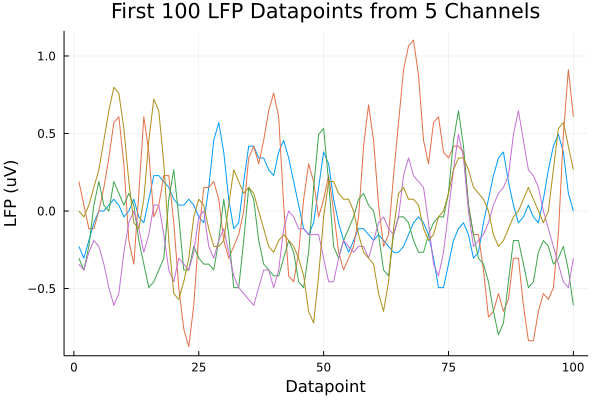

In [45]:
plot(lfp_data[1,1:100], legend=false)
for i in 2:5
    plot!(lfp_data[i,1:100], legend=false)
end
title!("First 100 LFP Datapoints from 5 Channels")
xlabel!("Datapoint")
ylabel!("LFP (uV)")

## Importing - O2 

In [32]:
# Indexing o2_data[datapoint, time/o2]

data_path = "Exp 1/R4/"
filename = "o2data R4.txt"
o2_data = []
open("../data/$(data_path)$(filename)") do file
    for line in eachline(file)
        if isdigit(line[1])
            data_element = split(line, "\t")
            data_element = [parse(Float32, data_element[1]), parse(Float32, data_element[2])]
            push!(o2_data, data_element)
        end
    end
end
o2_data = reduce(vcat,transpose.(o2_data))

1508564×2 Matrix{Float32}:
    0.0    -114.384
    0.001  -114.384
    0.002  -114.384
    0.003  -114.384
    0.004  -114.384
    0.005  -114.384
    0.006  -114.384
    0.007  -114.384
    0.008  -114.384
    0.009  -114.384
    ⋮      
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092
 1508.56    -91.092

## Visualisations - O2

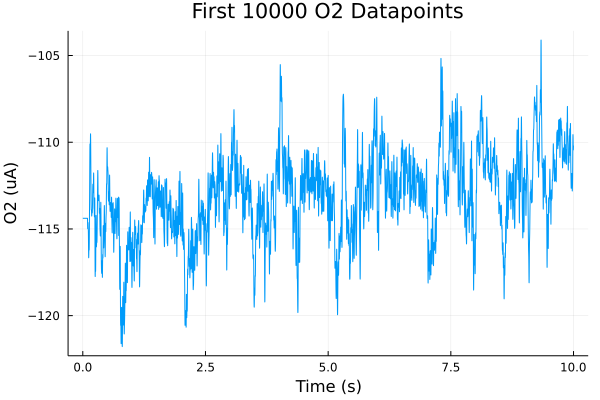

In [44]:
plot(o2_data[1:10000, 1], o2_data[1:10000, 2], legend=false)
title!("First 10000 O2 Datapoints")
xlabel!("Time (s)")
ylabel!("O2 (uA)")